# Chapter 3 - Classifcation

In [79]:
# download/fetch MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [80]:
X, y = mnist["data"], mnist["target"]
X.shape #70,000 images, each image has 784 features. each image is 28x28 pixels

(70000, 784)

In [82]:
y.shape

(70000,)

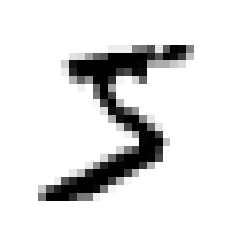

In [84]:
# rab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s imshow() function:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [85]:
y[0] # label is a string

'5'

(-0.5, 27.5, 27.5, -0.5)

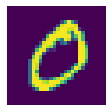

In [86]:
digit = X[1]
digit_pixels = digit.reshape(28, 28)
plt.subplot(132)
plt.imshow(digit_pixels)
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

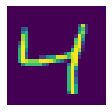

In [92]:
digit = X[2]
digit_pixels = digit.reshape(28, 28)
plt.subplot(133)
plt.imshow(digit_pixels)
plt.axis('off')

In [93]:
y[2]

'4'

In [94]:
# convert target from string to number
import numpy as np
y = y.astype(np.uint8)

In [95]:
# train and test set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [96]:
# create the target vectors for this classification task
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [97]:
# start with stochastic gradient decent (SGD) using scikit-learn's SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [98]:
# use it to detect images of the number 5
sgd_clf.predict([some_digit])

array([ True])

In [99]:
# use cross_val_score() to evaluate the SGDClassifier using K-fold cross-validation with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [100]:
# if we classify every single image as "not-5"
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [101]:
# check the accuracy
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [102]:
# cross_val_predict() performs K-fold cross-validation
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [103]:
# confusion_matrix() by passing it the target class (y_train_5) and the predicted classes (y_train_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [104]:
# pretend a perfect prediction. only non-zero value in main diagonal (top left to button right)
y_train_perfect_predictions = y_train_5 #pretend we reached a perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [105]:
# precision
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)
(3530/3530+687)
# When it claims an image represents a 5, it is correct only 83.708% of the time. 

688.0

In [106]:
# recall
recall_score(y_train_5, y_train_pred)
(3530/3530+1891)
# More‐ over, it only detects 65.117% of the 5s.

1892.0

In [107]:
# use f1_score() to computer F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [108]:
# Scikit-Learn decision_function() returns a score for each instance
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [109]:
threshold = 0 
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [110]:
# raise the threshold to 8000:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [111]:
# use cross_val_predict() and specify decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

In [112]:
# with these scores you can compute precision and recall for all possible thresh‐ olds using the precision_recall_curve() function:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [113]:
# use Matplotlib to plot precision and recall

def plot_precision_recall_vs_threhold(precision, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    [...] #highlight the threshold, add the legend, axis label and grid
    
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    plt.show()

In [114]:
# np.argmax() gives the 1st index of the maximum value
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [115]:
# to make prediction
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [116]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [117]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [118]:
# use the roc_curve()
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [119]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [122]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [124]:
# use the positive class's probability as the score

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

In [149]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--') #dashed diagnoal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)
    
    plt.figure(figsize=(8,6))
    plot_roc_curve(fpr, tpr)
    plt.plot([4.837e-3, 4.837e-3], [0., 0.4386], "r:")
    plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
    plt.plot([4.837e-3], [0.4368], "ro")
    save.fig("roc_curve_plot")
    plt.show()

NameError: name 'plot_rot_curve' is not defined

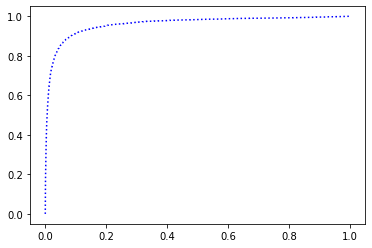

In [150]:
# to plot ROC curve
plt.plot(fpr, tpr, "b:", label="SGD")
plot_rot_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [130]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [137]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [151]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

### Multiclass Classification

In [152]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

In [153]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [154]:
np.argmax(some_digit_scores)

3

In [155]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [156]:
sgd_clf.classes_[3]

3

In [157]:
# force ScikitLearn to use OvO or OvA. use OnvVsOneClassifier() or OneVsRestClassifier()
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5], dtype=uint8)

In [158]:
len(ovo_clf.estimators_)

45

Train a RandomForestClassifier

In [159]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5], dtype=uint8)

In [160]:
# use predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.01, 0.08, 0.  , 0.9 , 0.  , 0.  , 0.  , 0.01]])

In [161]:
# cross_val_score() to evaluate the SGDClassifier's accuracy
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [162]:
# scaling the input increase the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.8983, 0.891 , 0.9018])

Error Analysis

In [163]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matri(y_train, y_train_pred)
conf_mx

NameError: name 'confusion_matri' is not defined

In [ ]:
# image
plt.matshow(conf_mx, cmap=p;t.cm.gray)
plt.show()

In [ ]:
row_sums = conf.mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()